In [95]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [96]:
dfTulare=pd.read_csv(r"C:\Users\Acer\Documents\Project Folder\Tulare_county.csv")
dfNDVI=pd.read_csv(r"C:\Users\Acer\Documents\Project Folder\Tulare_NDVI.csv")
dfGNDVI=pd.read_csv(r"C:\Users\Acer\Documents\Project Folder\Tulare_GNDVI.csv")
dfSAVI=pd.read_csv(r"C:\Users\Acer\Documents\Project Folder\Tulare_SAVI.csv")
dfNDMI=pd.read_csv(r"C:\Users\Acer\Documents\Project Folder\Tulare_NDMI.csv")
dfNBR=pd.read_csv(r"C:\Users\Acer\Documents\Project Folder\Tulare_NBR.csv")
dfNDVI.drop(columns=["fid"],inplace=True)
dfGNDVI.drop(columns=["fid"],inplace=True)
dfSAVI.drop(columns=["fid"],inplace=True)
dfNDMI.drop(columns=["fid"],inplace=True)
dfNBR.drop(columns=["fid"],inplace=True)

In [97]:
NDVI=dfNDVI.to_numpy()
GNDVI=dfGNDVI.to_numpy()
NDMI=dfNDMI.to_numpy()
SAVI=dfSAVI.to_numpy()
NBR=dfNBR.to_numpy()

In [98]:
Data=np.hstack((NDVI,GNDVI,NDMI,SAVI,NBR))
np.shape(Data)

(26306, 35)

In [99]:
mean = np.nanmean(Data,axis=0)
std=np.nanstd(Data,axis=0)
Data -= mean
Data /= std

In [100]:
dfTarget=dfTulare["croptyp2"]
Targetdict={'D5':0,'D12':1, 'D13':2, 'D14':3, 'X':4, 'V':5, 'C':6,}
def to_one_hot(labels, dimension=7):
   results = np.zeros((len(labels), dimension))
   for i, label in enumerate(labels):
     results[i, Targetdict[label]] = 1.
   return results
Target=to_one_hot(dfTarget)

In [101]:
rng=np.random.default_rng(seed=20)
index=np.arange(len(Target))
rng.shuffle(index)
Target=Target[index]
Data=Data[index]
Target_train=Target[:20000]
Target_validate=Target[20000:]

In [102]:
Data_train=Data[:20000]
Data_validate=Data[20000:]

In [103]:
model = keras.Sequential([
 layers.Dense(128, activation="relu"),
 layers.Dense(256, activation="relu"),
 layers.Dense(7, activation="softmax")
])

In [104]:
model.compile(optimizer="adam",
 loss="categorical_crossentropy",
 metrics=["accuracy"])

In [105]:
history = model.fit(Data_train,Target_train,epochs=20,batch_size=128,validation_data=(Data_validate,Target_validate))


Epoch 1/20


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7031 - loss: 0.9219 - val_accuracy: 0.8565 - val_loss: 0.4476
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8651 - loss: 0.4215 - val_accuracy: 0.8798 - val_loss: 0.3651
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8837 - loss: 0.3491 - val_accuracy: 0.8860 - val_loss: 0.3302
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8963 - loss: 0.3072 - val_accuracy: 0.8934 - val_loss: 0.3145
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9017 - loss: 0.2921 - val_accuracy: 0.9037 - val_loss: 0.2833
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9051 - loss: 0.2770 - val_accuracy: 0.9083 - val_loss: 0.2712
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9124 - loss: 0.2592 - val_accuracy: 0.8996 - val_loss: 0.2796
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9144 - loss: 0.2521 - val_accuracy: 0.9096 - val_

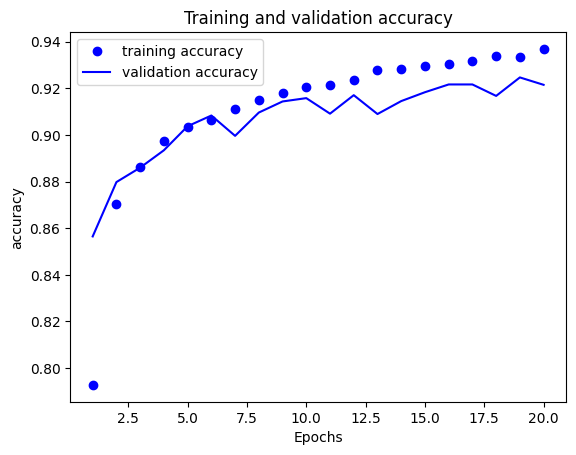

In [106]:
loss = history.history["accuracy"]
val_loss = history.history["val_accuracy"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="training accuracy")
plt.plot(epochs, val_loss, "b", label="validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()